In [32]:
import pandas as pd # pandas importieren um mit csv dateien arbeiten zu können
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
df = pd.read_csv("personality_dataset.csv")
df.head()       # Zeigt die ersten 5 Zeilen
df.info()       # Zeigt Spaltennamen, Datentypen und Nullwerte
df.describe()   # Statistische Zusammenfassung (für numerische Spalten)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [36]:
df['Stage_fear'] = df['Stage_fear'].map({'No': 0, 'Yes': 1})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'No': 0, 'Yes': 1})
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})
print(df.isnull().sum())

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [38]:
df = df.dropna()
df.head()       # Zeigt die ersten 5 Zeilen
df.info()       # Zeigt Spaltennamen, Datentypen und Nullwerte
df.describe()   # Statistische Zusammenfassung (für numerische Spalten)

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   float64
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   float64
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 174.2 KB


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,4.522406,0.498991,3.939039,3.013726,0.498991,6.239806,3.559548,0.514332
std,3.491162,0.500100,2.900044,2.257239,0.500100,4.311365,2.927397,0.499895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,1.000000
75%,8.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


Personality
1    1274
0    1203
Name: count, dtype: int64
Personality
1    51.433185
0    48.566815
Name: proportion, dtype: float64


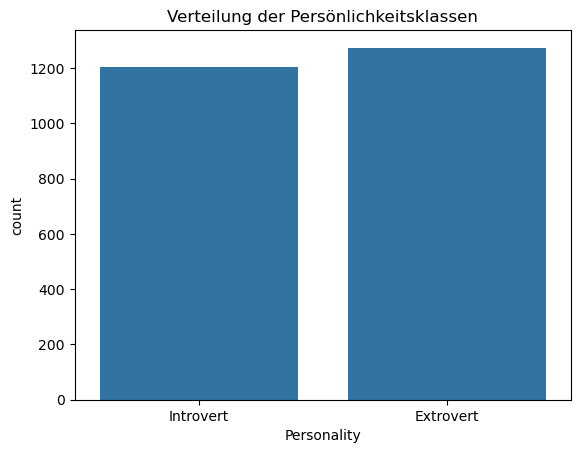

In [40]:
print(df["Personality"].value_counts()) # Werte und Häufigkeit in "Persoanality"
print(df["Personality"].value_counts(normalize=True) * 100) # Verhältnis in Prozent
sns.countplot(data=df, x='Personality')
plt.title("Verteilung der Persönlichkeitsklassen")
plt.xticks([0,1], ['Introvert', 'Extrovert'])
plt.show()

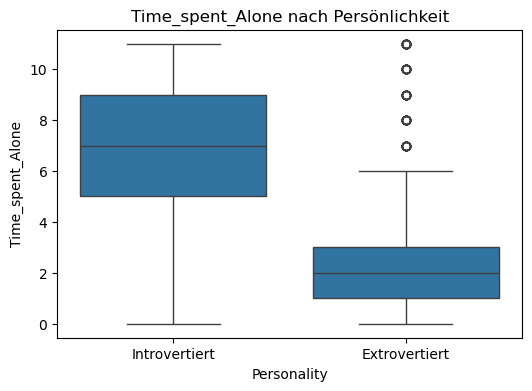

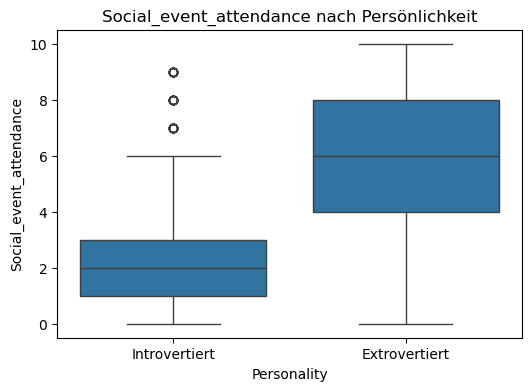

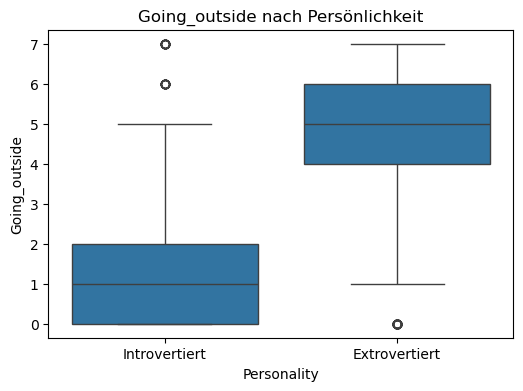

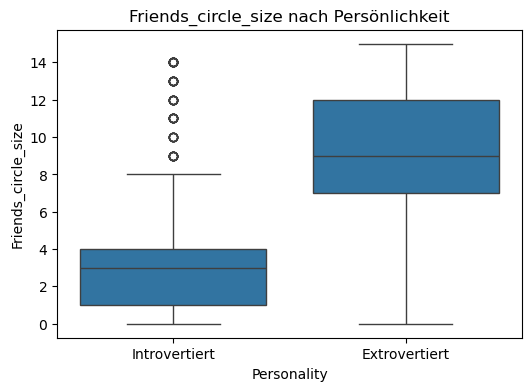

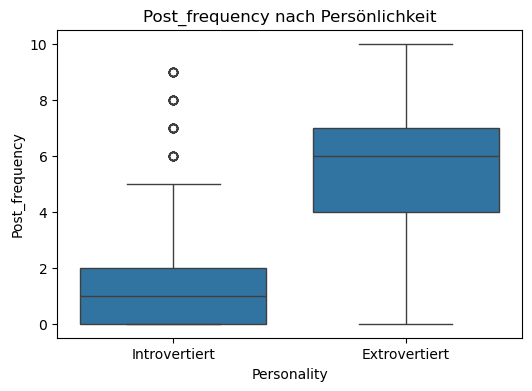

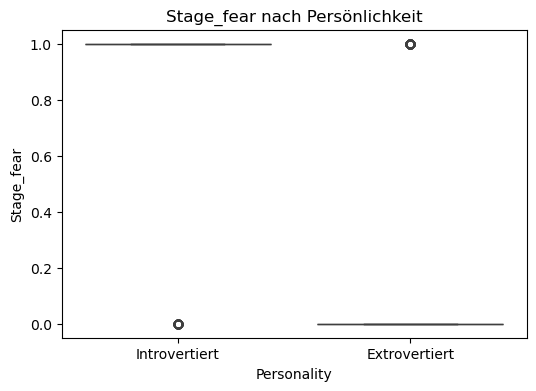

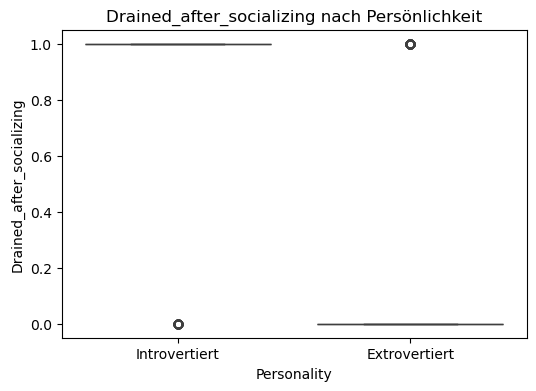

In [42]:
features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency', 'Stage_fear', 'Drained_after_socializing']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Personality', y=col, data=df)
    plt.xticks([0,1], ['Introvertiert', 'Extrovertiert'])
    plt.title(f'{col} nach Persönlichkeit')
    plt.show()

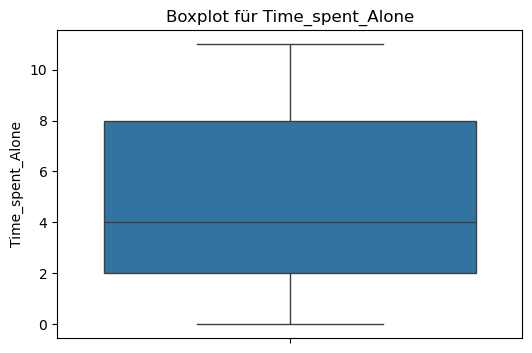

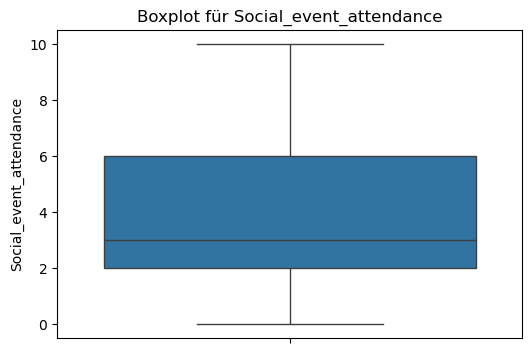

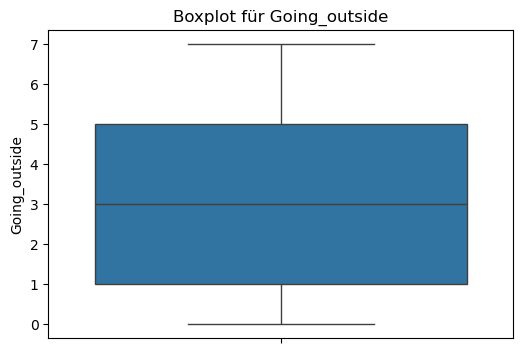

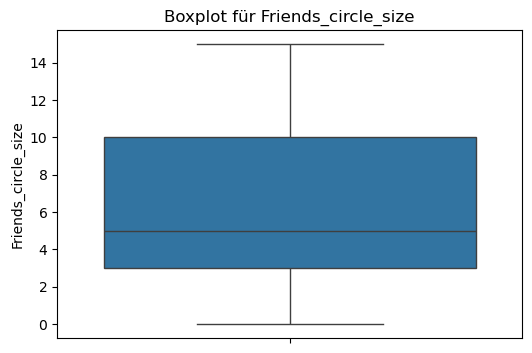

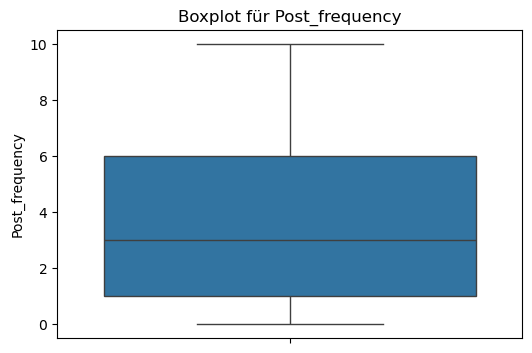

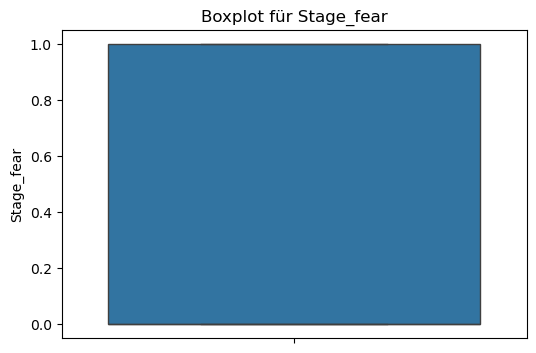

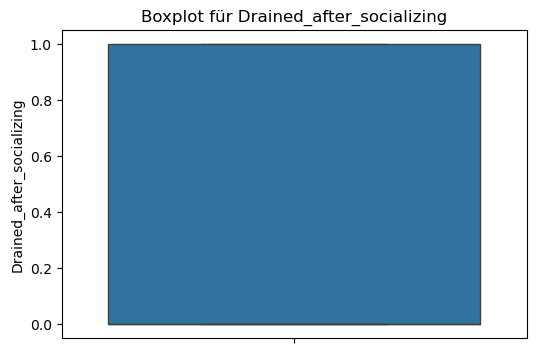

0 Zeilen wurden aufgrund von Ausreißern entfernt.


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
 
features = [
    'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
    'Friends_circle_size', 'Post_frequency', 'Stage_fear', 'Drained_after_socializing'
]
 
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])  # nur die Variable selbst, ohne x=Kategorie
    plt.title(f'Boxplot für {col}')
    plt.show()
# Liste der numerischen Spalten
features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency', 'Stage_fear', 'Drained_after_socializing']

# Ursprüngliche Zeilenzahl speichern
original_rows = df.shape[0]

# Schrittweise Ausreißer entfernen
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Neue Zeilenzahl und Differenz anzeigen
cleaned_rows = df.shape[0]
removed_rows = original_rows - cleaned_rows
print(f"{removed_rows} Zeilen wurden aufgrund von Ausreißern entfernt.")

In [44]:
# Umfassende Ausreißerentfernung basierend auf IQR-Methode (Whisker-Grenzen)
def remove_outliers_iqr(data_prep):
    df_clean = data_prep.copy()
    # Numerische Spalten für Ausreißerbehandlung
    numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency', 'Stage_fear', 'Drained_after_socializing']
    total_removed = 0
    removal_summary = {}
    for col in numeric_columns:
        # IQR berechnen
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        # Whisker-Grenzen berechnen
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR
        # Ausreißer identifizieren
        outliers_mask = (df_clean[col] < lower_whisker) | (df_clean[col] > upper_whisker)
        outliers_count = outliers_mask.sum()
        
        # Ausreißer entfernen
        df_clean = df_clean[~outliers_mask]
        
        # Statistiken sammeln
        removal_summary[col] = {
            'removed': outliers_count,
            'lower_bound': lower_whisker,
            'upper_bound': upper_whisker,
            'remaining': len(df_clean)
        }
        
        total_removed += outliers_count
        
        print(f"{col}:")
        print(f"  • Untere Grenze: {lower_whisker:,.2f}")
        print(f"  • Obere Grenze: {upper_whisker:,.2f}")
        print(f"  • Entfernte Ausreißer: {outliers_count:,}")
        print(f"  • Verbleibende Zeilen: {len(df_clean):,}")
        print()
    
    print("=" * 60)
    print(f"ZUSAMMENFASSUNG:")
    print(f"  • Gesamt entfernte Zeilen: {total_removed:,}")
    print(f"  • Verbleibende Zeilen: {len(df_clean):,}")
    print(f"  • Datenverlust: {(total_removed / len(data_prep)) * 100:.2f}%")
    print("=" * 60)
    
    return df_clean, removal_summary
 
# Anwendung auf den Datensatz
# Funktion anwenden auf deinen Datensatz (hier z.B. df)
df_cleaned, outlier_summary = remove_outliers_iqr(df)

Time_spent_Alone:
  • Untere Grenze: -7.00
  • Obere Grenze: 17.00
  • Entfernte Ausreißer: 0
  • Verbleibende Zeilen: 2,477

Social_event_attendance:
  • Untere Grenze: -4.00
  • Obere Grenze: 12.00
  • Entfernte Ausreißer: 0
  • Verbleibende Zeilen: 2,477

Going_outside:
  • Untere Grenze: -5.00
  • Obere Grenze: 11.00
  • Entfernte Ausreißer: 0
  • Verbleibende Zeilen: 2,477

Friends_circle_size:
  • Untere Grenze: -7.50
  • Obere Grenze: 20.50
  • Entfernte Ausreißer: 0
  • Verbleibende Zeilen: 2,477

Post_frequency:
  • Untere Grenze: -6.50
  • Obere Grenze: 13.50
  • Entfernte Ausreißer: 0
  • Verbleibende Zeilen: 2,477

Stage_fear:
  • Untere Grenze: -1.50
  • Obere Grenze: 2.50
  • Entfernte Ausreißer: 0
  • Verbleibende Zeilen: 2,477

Drained_after_socializing:
  • Untere Grenze: -1.50
  • Obere Grenze: 2.50
  • Entfernte Ausreißer: 0
  • Verbleibende Zeilen: 2,477

ZUSAMMENFASSUNG:
  • Gesamt entfernte Zeilen: 0
  • Verbleibende Zeilen: 2,477
  • Datenverlust: 0.00%


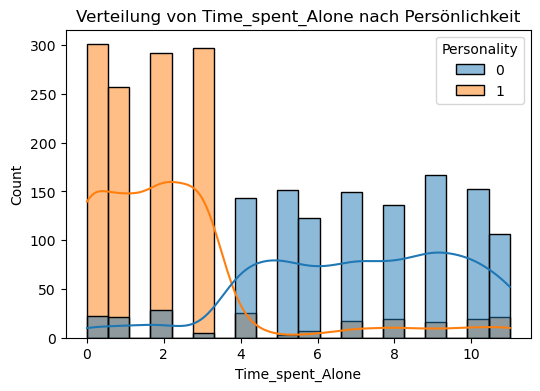

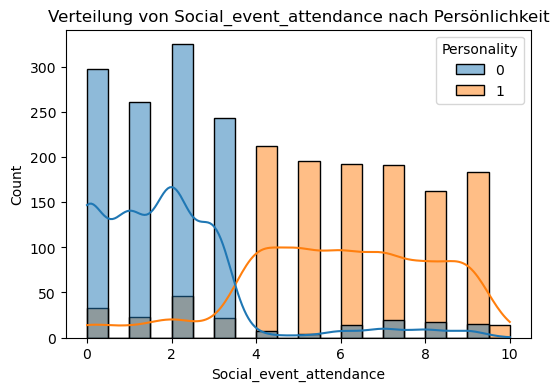

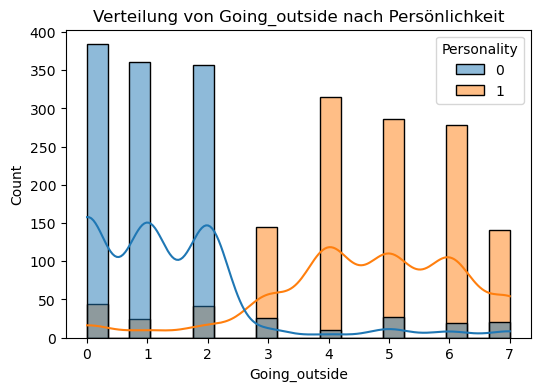

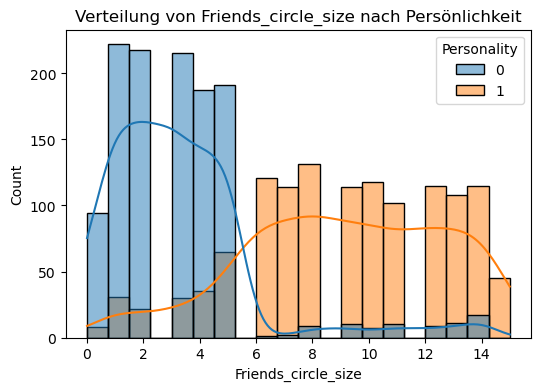

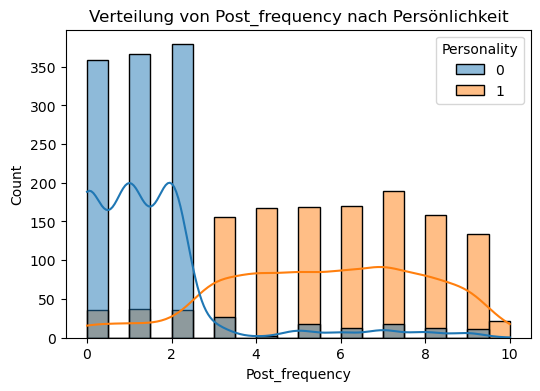

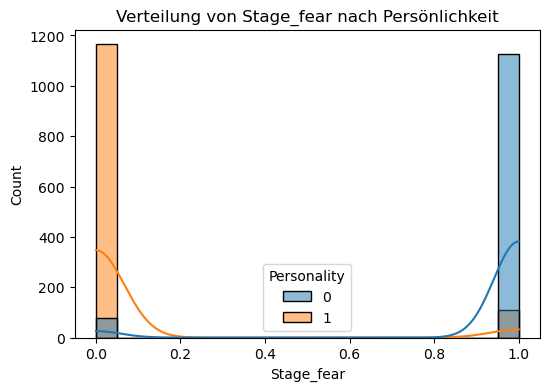

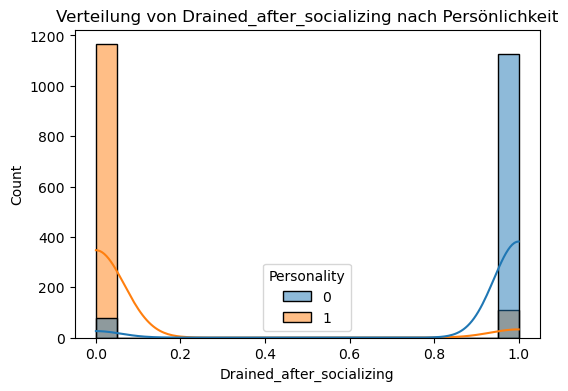

In [45]:
for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Personality', kde=True, bins=20)
    plt.title(f'Verteilung von {col} nach Persönlichkeit')
    plt.show()

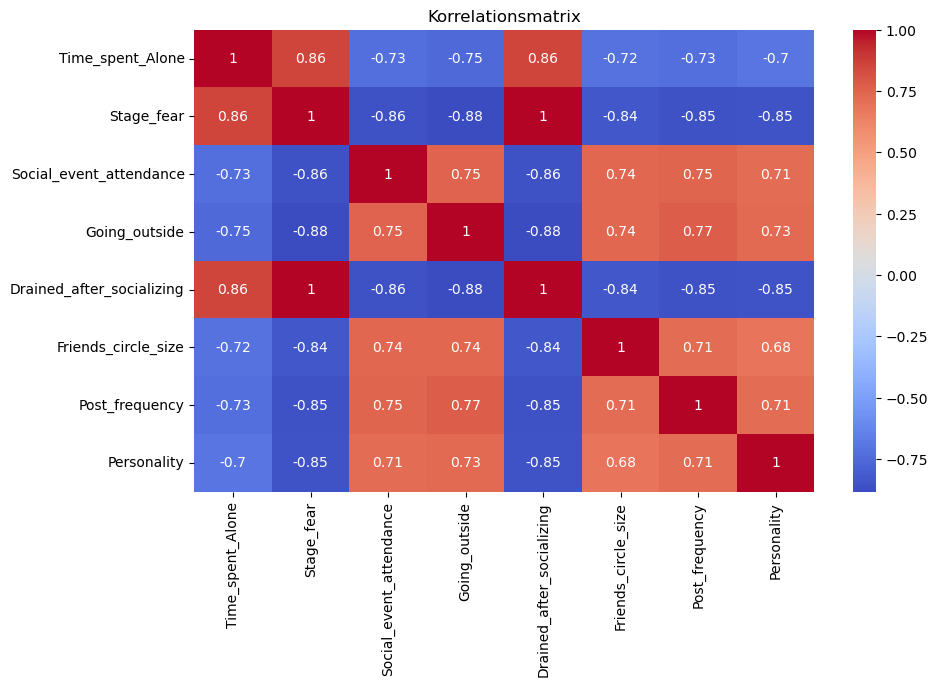

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix")
plt.show()

In [80]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Falls du 'X' schon hast, z. B. nach dem One-Hot-Encoding
# Optional: Entferne perfekt korrelierte Spalten
X_vif = X.drop(columns=['Stage_fear'])  # oder 'drained_after_socializing'

# VIF DataFrame erstellen
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Ergebnisse anzeigen
print(vif_data)

                    Variable        VIF
0           Time_spent_Alone  10.225770
1    Social_event_attendance   8.575014
2              Going_outside   9.052326
3  Drained_after_socializing   9.196797
4        Friends_circle_size   8.169418
5             Post_frequency   7.722033


In [50]:
#sns.pairplot(df, hue="Personality")
#plt.suptitle("Pairplot aller Merkmale", y=1.02)
#plt.show()

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Falls du 'X' schon hast, z. B. nach dem One-Hot-Encoding
# Optional: Entferne perfekt korrelierte Spalten
X_vif = X.drop(columns=['Stage_fear'])  # oder 'drained_after_socializing'

# VIF DataFrame erstellen
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Ergebnisse anzeigen
print(vif_data)

In [53]:
from sklearn.model_selection import train_test_split

# Features (X) und Zielvariable (y) definieren
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Train-Test-Split (z. B. 80 % Training, 20 % Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

# Skalierung der Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Modell trainieren
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Vorhersagen auf den Testdaten
y_pred = model.predict(X_test_scaled)

# Klassifikationsbericht
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Introvertiert", "Extrovertiert"]))

# Optional einzeln ausgeben
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print(f"F1-Score: {f1:.3f}")

# Confusion Matrix anzeigen
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

Classification Report:
               precision    recall  f1-score   support

Introvertiert       0.90      0.92      0.91       250
Extrovertiert       0.92      0.89      0.91       246

     accuracy                           0.91       496
    macro avg       0.91      0.91      0.91       496
 weighted avg       0.91      0.91      0.91       496

Accuracy: 0.907
F1-Score: 0.905
Confusion Matrix:
[[230  20]
 [ 26 220]]
MAE: 0.09


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features und Zielvariable definieren
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalieren der Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multiple Lineare Regression trainieren
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Vorhersagen (Regressionsergebnisse)
y_pred = model.predict(X_test_scaled)

# Schwellenwert anwenden (0.5) zur binären Klassifikation
y_class = (y_pred >= 0.5).astype(int)

# Klassifikationsbericht
print("Classification Report:")
print(classification_report(y_test, y_class, target_names=["Introvertiert", "Extrovertiert"]))

# Einzelne Metriken ausgeben
acc = accuracy_score(y_test, y_class)
f1 = f1_score(y_test, y_class)
print(f"Accuracy: {acc:.3f}")
print(f"F1-Score: {f1:.3f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_class))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")


Classification Report:
               precision    recall  f1-score   support

Introvertiert       0.91      0.95      0.93       250
Extrovertiert       0.94      0.91      0.93       246

     accuracy                           0.93       496
    macro avg       0.93      0.93      0.93       496
 weighted avg       0.93      0.93      0.93       496

Accuracy: 0.927
F1-Score: 0.925
Confusion Matrix:
[[237  13]
 [ 23 223]]
MAE: 0.14


In [61]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Features und Zielvariable definieren
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Features skalieren (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Klassifikator initialisieren
model = xgb.XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42)

# Modell trainieren
model.fit(X_train_scaled, y_train)

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test_scaled)

# Klassifikationsbericht ausgeben
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Introvertiert", "Extrovertiert"]))

# Accuracy und F1-Score ausgeben
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print(f"F1-Score: {f1:.3f}")

# Confusion Matrix anzeigen
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")


Classification Report:
               precision    recall  f1-score   support

Introvertiert       0.90      0.93      0.92       250
Extrovertiert       0.93      0.90      0.91       246

     accuracy                           0.92       496
    macro avg       0.92      0.92      0.92       496
 weighted avg       0.92      0.92      0.92       496

Accuracy: 0.915
F1-Score: 0.913
Confusion Matrix:
[[233  17]
 [ 25 221]]
MAE: 0.08


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:27:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
